<a href="https://colab.research.google.com/github/alau55/alau55-github.com/blob/master/Quick_Demo_Brain_Tumor_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
 from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
#Reading the training images from the path and labelling them into the given categories
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
import seaborn as sns

In [9]:
## importing the required tensorflow libraries
import tensorflow as tf
import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Conv3D, MaxPool2D, BatchNormalization, Dropout, Flatten, LeakyReLU, GlobalAveragePooling2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from keras import optimizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras import losses
from keras import applications

## resnet
from keras.applications.resnet50 import ResNet50
#from keras.applications.resnet.ResNet101 import ResNet101
#from keras.applications.resnet.ResNet152 import ResNet152

from keras.models import Model

from sklearn.metrics import classification_report, confusion_matrix

print(tf.__version__)

2.5.0


Category: glioma_tumor


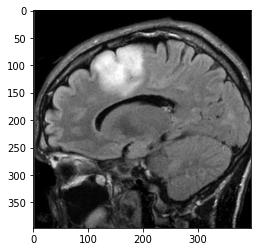

Number of combine image of category glioma_tumor : 397
Category: meningioma_tumor


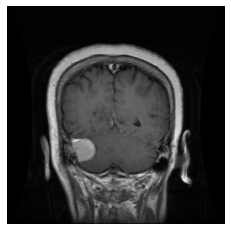

Number of combine image of category meningioma_tumor : 512
Category: no_tumor


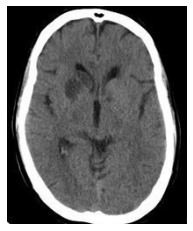

Number of combine image of category no_tumor : 249
Category: pituitary_tumor


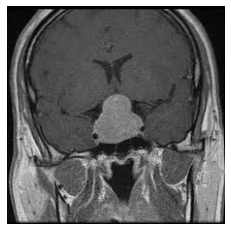

Number of combine image of category pituitary_tumor : 225


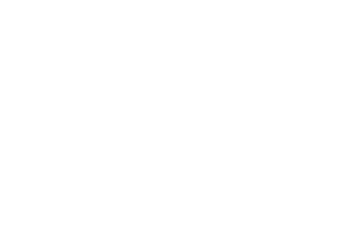

In [15]:
## Loading a combined data set and then split

#loading the combined data

DATADIR_COMB = r"/content/drive/MyDrive/MIT_DS_bootcamp/Capstone_project/Data Set Brain Tumor/Combined/"
CATEGORIES_COMB = ["glioma_tumor","meningioma_tumor","no_tumor","pituitary_tumor"]
for category_comb in CATEGORIES_COMB:
    path_comb = os.path.join(DATADIR_COMB,category_comb)
    for img_comb in os.listdir(path_comb):
        print("Category:",category_comb)
        img_array_comb = cv2.imread(os.path.join(path_comb,img_comb))
        plt.imshow(img_array_comb)
        plt.show()
        plt.axis("off")
        break
        # Number, size and shape of combined images
    #print("Sample combine image of category :", category_comb,":", format(img_array_comb))
    #print("Sample combine image size of category :", category_comb,":", format(img_array_comb.size))
    #print("Sample combine image shape of category :", category_comb,":", format(img_array_comb.shape))
    print("Number of combine image of category", category_comb,":",len(img_array_comb))
    #break

(-0.5, 223.5, 223.5, -0.5)

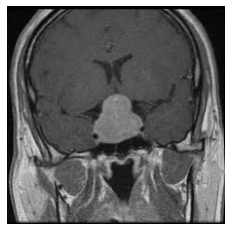

In [16]:
#Reshaping all the images to 224X224 (in milestone 1, it was resize to 150X150)
IMG_SIZE_COMB = 224
new_array_comb = cv2.resize(img_array_comb,(IMG_SIZE_COMB,IMG_SIZE_COMB))    
plt.imshow(new_array_comb,cmap = "gray")
plt.axis("off")

In [17]:
#Storing all the images (combine)
comb_data = []

#resizing each of the image (combine)

def create_combine_data():
    for category_comb in CATEGORIES_COMB:
        path_comb = os.path.join(DATADIR_COMB,category_comb)
        class_num_comb = CATEGORIES_COMB.index(category_comb)
        for img_comb in os.listdir(path_comb):
            try:
                img_array_comb = cv2.imread(os.path.join(path_comb,img_comb),cv2.IMREAD_GRAYSCALE)
                new_array_comb = cv2.resize(img_array_comb,(IMG_SIZE_COMB,IMG_SIZE_COMB)) 
                comb_data.append([new_array_comb,class_num_comb])
            except Exception as e:
                pass
create_combine_data()

In [18]:
X_comb = []
y_comb = []

for features_comb,label_comb in comb_data:
    X_comb.append(features_comb)
    y_comb.append(label_comb)
X_comb = np.array(X_comb).reshape(-1,IMG_SIZE_COMB,IMG_SIZE_COMB)
print(X_comb.shape)
#normalization
X_comb = X_comb/255.0  
X_comb = X_comb.reshape(-1,IMG_SIZE_COMB,IMG_SIZE_COMB,1)

(3168, 224, 224)


In [19]:
#shape of the images (combined)

print("Combined data X shape:", X_comb[:].shape)
print("Combined data X shape 0:",X_comb.shape[0])

Combined data X shape: (3168, 224, 224, 1)
Combined data X shape 0: 3168


In [20]:
#split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_comb, y_comb, test_size=0.2, random_state=55)

print("Combined training data X shape:", X_train.shape)
print("Combined testing data X shape:",X_test.shape)


Combined training data X shape: (2534, 224, 224, 1)
Combined testing data X shape: (634, 224, 224, 1)


In [21]:
#one hot encode output: creating one-hot encoded representation of target labels
y_train1 = to_categorical(y_train)
y_test1 = to_categorical(y_test)

print('shape of combine y output',y_train1.shape)
print('shape of combine y output',y_test1.shape)

shape of combine y output (2534, 4)
shape of combine y output (634, 4)


In [22]:
IMG_SIZE = IMG_SIZE_COMB
CATEGORIES = CATEGORIES_COMB

In [34]:
#CNN model building

def cnn_model():

  #Initialing the sequential model object
  model = Sequential()

  #Generating the model and adding layers
  #Two convolution layers and pooling layer

  #First convolutional layer with 16 filters and kernal size=3. Use the 'same' padding and provide apt input shape.
  model.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', padding='same', data_format='channels_last', input_shape=(IMG_SIZE,IMG_SIZE,1)))

  model.add(MaxPool2D(pool_size=2))

  #Second convolutional layer
  model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same', data_format='channels_last'))

  model.add(MaxPool2D(pool_size=2))

  model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same', data_format='channels_last'))

  #Add a maxpooling layer with pool size of 2
  model.add(MaxPool2D(pool_size=2))

  #Flatten the output from the previous layer
  model.add(Flatten())

  #making room for the fully connected component
  #Add a dense layer with 64 nodes
  model.add(Dense(32,activation='relu'))
  model.add(BatchNormalization())
  #Add a dense layer with 32 nodes
  model.add(Dense(16,activation='relu'))
  model.add(BatchNormalization())
  #Add a dense layer with 4 nodes
  model.add(Dense(4,activation='softmax'))

  #Optimizer for the model, Adam with a learning rate(lr) of 0.001
  optimizer = Adam(lr=0.001)
  model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

  return model

In [35]:
#Let's summarize the model structure

model = cnn_model()
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 224, 224, 16)      160       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 112, 112, 32)      4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 56, 56, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 50176)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [36]:
#look at the shape again to confirm 
print('shape of training:',X_train.shape)
print('shape of testing:',X_test.shape)
print('shape of training output',y_train1.shape)
print('shape of testing output',y_test1.shape)

shape of training: (2534, 224, 224, 1)
shape of testing: (634, 224, 224, 1)
shape of training output (2534, 4)
shape of testing output (634, 4)


In [37]:
#Fitting the model with a batch size of 64 and 20 epochs

hist_model = model.fit(X_train, y_train1, validation_data=(X_test, y_test1), verbose=1, batch_size=64, epochs=20)

Epoch 1/20
40/40 [==============================] - 14s 336ms/step - loss: 1.1091 - accuracy: 0.5635 - val_loss: 1.3961 - val_accuracy: 0.2413
Epoch 2/20
40/40 [==============================] - 13s 336ms/step - loss: 0.6700 - accuracy: 0.7837 - val_loss: 1.1137 - val_accuracy: 0.5284
Epoch 3/20
40/40 [==============================] - 13s 338ms/step - loss: 0.4489 - accuracy: 0.8686 - val_loss: 2.3714 - val_accuracy: 0.2666
Epoch 4/20
40/40 [==============================] - 13s 336ms/step - loss: 0.2977 - accuracy: 0.9305 - val_loss: 1.5448 - val_accuracy: 0.2902
Epoch 5/20
40/40 [==============================] - 13s 335ms/step - loss: 0.2129 - accuracy: 0.9515 - val_loss: 2.8749 - val_accuracy: 0.2871
Epoch 6/20
40/40 [==============================] - 13s 336ms/step - loss: 0.1332 - accuracy: 0.9815 - val_loss: 0.5541 - val_accuracy: 0.8312
Epoch 7/20
40/40 [==============================] - 14s 339ms/step - loss: 0.0894 - accuracy: 0.9901 - val_loss: 0.5658 - val_accuracy: 0.8139

** Evaluation Metrices**
1. Confusion Matrix
2. Accuracy
3. F1 Score
4. Precision
5. Recall


Confusion Matrix:  [[176   4   7   0]
 [ 49  95  11  14]
 [  3   3  87   1]
 [  4   0   0 180]]


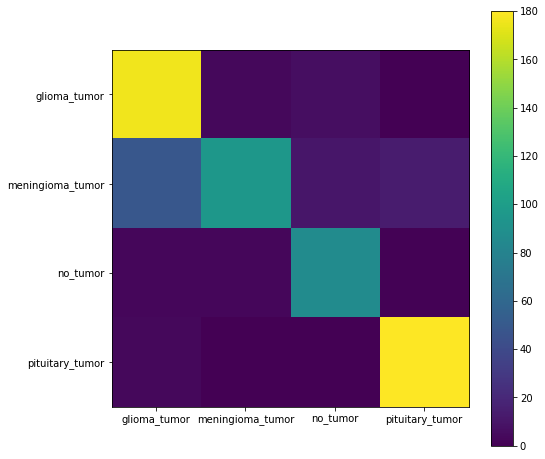

Classification Report
                  precision    recall  f1-score   support

    glioma_tumor       0.76      0.94      0.84       187
meningioma_tumor       0.93      0.56      0.70       169
        no_tumor       0.83      0.93      0.87        94
 pituitary_tumor       0.92      0.98      0.95       184

        accuracy                           0.85       634
       macro avg       0.86      0.85      0.84       634
    weighted avg       0.86      0.85      0.84       634



In [38]:
from sklearn.metrics import classification_report

test_pred = np.argmax(model.predict(X_test), axis=-1)

#confusion matrix
cm = confusion_matrix(y_test, test_pred)
print('Confusion Matrix: ',cm)

#plot the confusion matrix
plt.figure(figsize=(8,8))
plt.imshow(confusion_matrix(y_test, test_pred))
plt.xticks(np.arange(4),CATEGORIES)
plt.yticks(np.arange(4),CATEGORIES)
plt.colorbar()
plt.show()

#classification report

print('Classification Report')

print(classification_report(y_test, test_pred, target_names=CATEGORIES))

**Observations** The overall accuracy is pretty good at 0.85


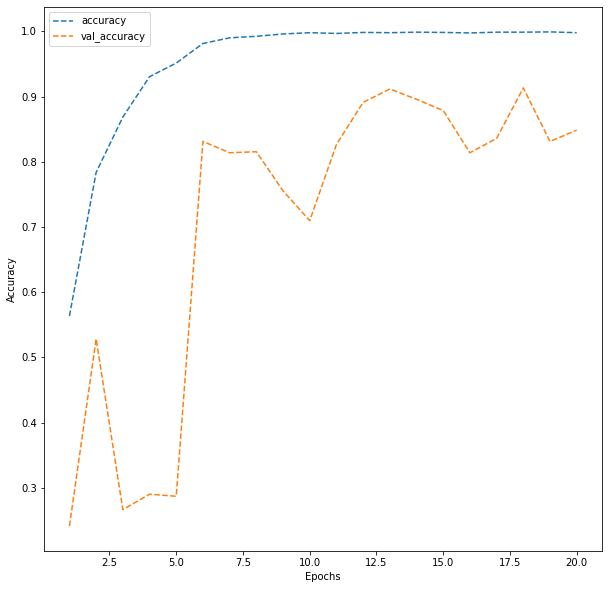

In [39]:
#plotting the accuracies

dict_hist = hist_model.history

list_ep = [i for i in range(1,21)]

plt.figure(figsize=(10,10))

plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label='accuracy')
plt.plot(list_ep, dict_hist['val_accuracy'],ls = '--', label='val_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show() 

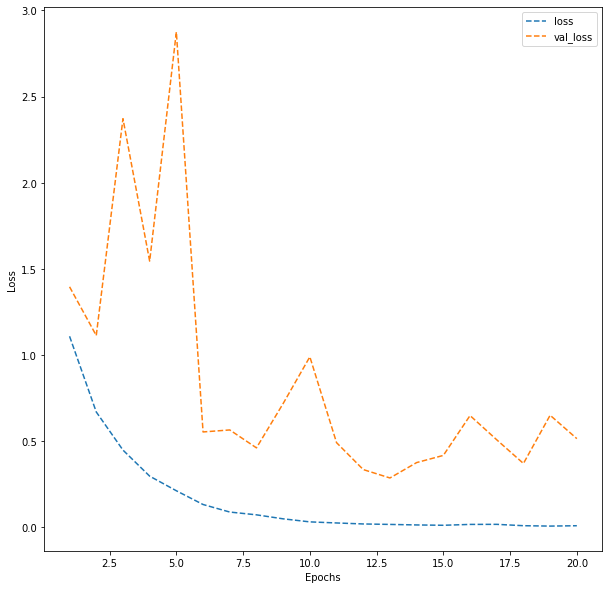

In [40]:
#plotting the loss

dict_hist = hist_model.history

list_ep = [i for i in range(1,21)]

plt.figure(figsize=(10,10))

plt.plot(list_ep, dict_hist['loss'], ls = '--', label='loss')
plt.plot(list_ep, dict_hist['val_loss'],ls = '--', label='val_loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show() 

In [41]:
#Iteration 2: Adding dropout layers to make the model generalize better
#CNN model building

#CNN model building

def cnn_model2():

  #Initialing the sequential model object
  model2 = Sequential()

  #Generating the model and adding layers
  #Two convolution layers and pooling layer

  #First convolutional layer with 32 filters and kernal size=3. Use the 'same' padding and provide apt input shape.
  model2.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', padding='same', data_format='channels_last', input_shape=(IMG_SIZE,IMG_SIZE,1)))
  model2.add(MaxPool2D(pool_size=2))
  #new drop out 1st layer to randomly switch off 20%
  #model2.add(Dropout(0.2))
  
  #Second layer
  model2.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same', data_format='channels_last'))
  #new drop out layer to randomly switch off 20%
  model2.add(Dropout(0.2))

  #Add a maxpooling layer with pool size of 2
  model2.add(MaxPool2D(pool_size=2))
  
  #Third layer
  model2.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same', data_format='channels_last'))
  model2.add(MaxPool2D(pool_size=2))
  #new drop out layer to randomly switch off 20%
  model2.add(Dropout(0.2))

  #Fourth layer
  model2.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same', data_format='channels_last'))

  #Add a maxpooling layer with pool size of 2
  model2.add(MaxPool2D(pool_size=2))

  #new drop out layer to randomly switch off 20%
  model2.add(Dropout(0.2))

  #Flatten the output from the previous layer
  model2.add(Flatten())

  #making room for the fully connected component
  #Add a dense layer with 32 nodes
  model2.add(Dense(64,activation='relu'))
  model2.add(BatchNormalization())
  #Add a dense layer with 16 nodes
  model2.add(Dense(16,activation='relu'))
  model2.add(BatchNormalization())
   #Add a dense layer with 4 nodes
  model2.add(Dense(4,activation='softmax'))

  #Optimizer for the model, Adam with a learning rate(lr) of 0.001
  optimizer = Adam(lr=0.001)
  #optimizer = Adamax(lr=0.005)
  model2.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

  return model2

In [42]:
#Let's summarize the model structure

model2 = cnn_model2()
model2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 224, 224, 16)      160       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 112, 112, 32)      4640      
_________________________________________________________________
dropout (Dropout)            (None, 112, 112, 32)      0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 56, 56, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 28, 28, 64)       

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [43]:
#Fitting the model with a batch size of 64 and 30 epochs

hist_model2 = model2.fit(X_train, y_train1, validation_data=(X_test, y_test1), verbose=1, batch_size=64, epochs=20)

Epoch 1/20
40/40 [==============================] - 17s 402ms/step - loss: 1.0076 - accuracy: 0.6038 - val_loss: 1.3788 - val_accuracy: 0.2886
Epoch 2/20
40/40 [==============================] - 16s 398ms/step - loss: 0.7479 - accuracy: 0.7281 - val_loss: 1.1388 - val_accuracy: 0.3864
Epoch 3/20
40/40 [==============================] - 16s 396ms/step - loss: 0.5964 - accuracy: 0.7845 - val_loss: 1.3087 - val_accuracy: 0.3438
Epoch 4/20
40/40 [==============================] - 16s 398ms/step - loss: 0.4772 - accuracy: 0.8366 - val_loss: 1.0009 - val_accuracy: 0.4448
Epoch 5/20
40/40 [==============================] - 16s 398ms/step - loss: 0.3858 - accuracy: 0.8737 - val_loss: 0.8544 - val_accuracy: 0.6246
Epoch 6/20
40/40 [==============================] - 16s 395ms/step - loss: 0.3170 - accuracy: 0.9021 - val_loss: 0.7651 - val_accuracy: 0.6262
Epoch 7/20
40/40 [==============================] - 16s 393ms/step - loss: 0.2670 - accuracy: 0.9171 - val_loss: 0.7413 - val_accuracy: 0.6372

Confusion Matrix:  [[158  11   6  12]
 [ 13 142   5   9]
 [  2   2  89   1]
 [  0   0   0 184]]


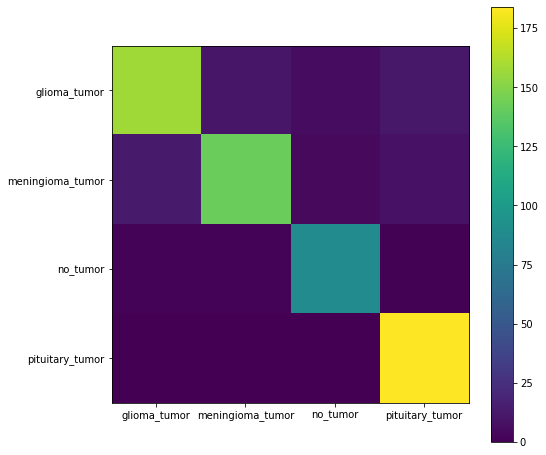

                  precision    recall  f1-score   support

    glioma_tumor       0.91      0.84      0.88       187
meningioma_tumor       0.92      0.84      0.88       169
        no_tumor       0.89      0.95      0.92        94
 pituitary_tumor       0.89      1.00      0.94       184

        accuracy                           0.90       634
       macro avg       0.90      0.91      0.90       634
    weighted avg       0.90      0.90      0.90       634



In [44]:
test_pred2 = np.argmax(model2.predict(X_test), axis=-1)

#confusion matrix
cm = confusion_matrix(y_test, test_pred2)
print('Confusion Matrix: ',cm)

#plot the confusion matrix
plt.figure(figsize=(8,8))
plt.imshow(confusion_matrix(y_test, test_pred2))
plt.xticks(np.arange(4),CATEGORIES)
plt.yticks(np.arange(4),CATEGORIES)
plt.colorbar()
plt.show()

#classification report
print(classification_report(y_test, test_pred2, target_names=CATEGORIES))

** Observation ** The overall accuracy is improved to 0.9

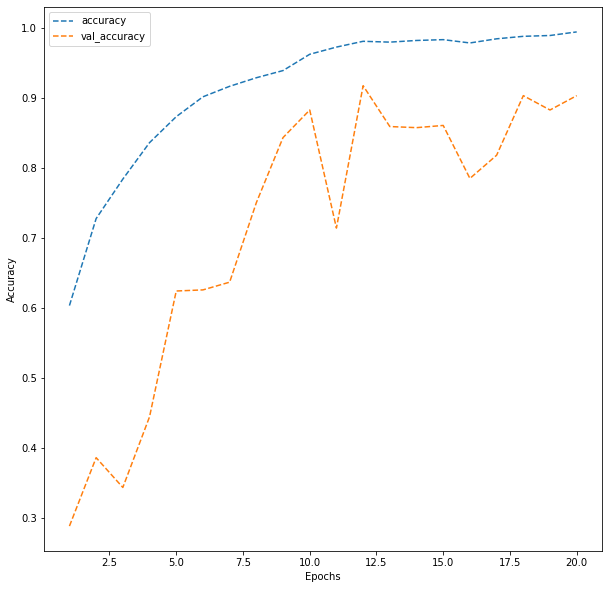

In [45]:
#plotting the accuracies

dict_hist2 = hist_model2.history

list_ep2 = [i for i in range(1,21)]

plt.figure(figsize=(10,10))

plt.plot(list_ep2, dict_hist2['accuracy'], ls = '--', label='accuracy')
plt.plot(list_ep2, dict_hist2['val_accuracy'],ls = '--', label='val_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show() 

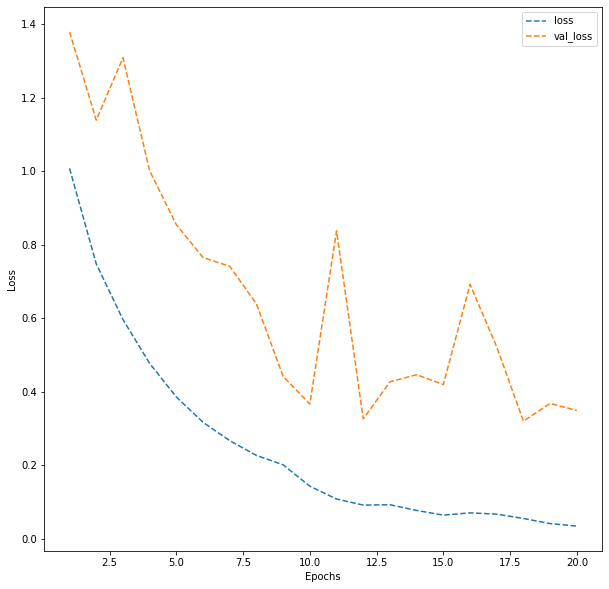

In [46]:
#plotting the loss

dict_hist2 = hist_model2.history

list_ep2 = [i for i in range(1,21)]

plt.figure(figsize=(10,10))

plt.plot(list_ep2, dict_hist2['loss'], ls = '--', label='loss')
plt.plot(list_ep2, dict_hist2['val_loss'],ls = '--', label='val_loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show() 

** Observation ** It seems the loss start converging after Epochs at 11.

*italicized text*
**Milestone 2 Oberservations:**
After I changed the resize from 150x150 to 224x224, the CNN performance improved immediately compared to when I first build the CNN model in milestone 1

Also, in iteration 2, after I increase the number of epochs, the accuarcy increases and the recall of category glioma_tumor increased. 

In [47]:
#Iteration: Using keras tuner to the simple CNN 
#setup keras tuners

import tensorflow as tf
from tensorflow import keras

import IPython

!pip install -U keras-tuner
import kerastuner as kt

     |████████████████████████████████| 96 kB 3.2 MB/s 
  Created wheel for kt-legacy: filename=kt_legacy-1.0.3-py3-none-any.whl size=9568 sha256=f5f223e029230f4022ac57e223484b9efa64151caa3828451a1b040461883626
  Stored in directory: /root/.cache/pip/wheels/38/5c/e0/13003e68c17f403af40b92a24d20171b95fef13b0fdaba833c
Successfully built kt-legacy


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  # Remove the CWD from sys.path while we load stuff.


In [48]:
#CNN model building with keras tuner

def cnn_model_tuner1(hp):

  #Initialing the sequential model object
  model_tuner1 = Sequential()

  #Generating the model and adding layers
  #Two convolution layers and pooling layer

  #First convolutional layer with 16 filters and kernal size=3. Use the 'same' padding and provide apt input shape.
  model_tuner1.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', padding='same', data_format='channels_last', input_shape=(IMG_SIZE,IMG_SIZE,1)))
  model_tuner1.add(MaxPool2D(pool_size=2))
  model_tuner1.add(Dropout(0.2))

  model_tuner1.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same', data_format='channels_last'))
  model_tuner1.add(MaxPool2D(pool_size=2))
  model_tuner1.add(Dropout(0.2))

  model_tuner1.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same', data_format='channels_last'))

  #Add a maxpooling layer with pool size of 2
  model_tuner1.add(MaxPool2D(pool_size=2))

  #Flatten the output from the previous layer
  model_tuner1.add(Flatten())

  #Tune the number of units in the dense layer
  #choose an optimal value between 32-512
  hp_units1 = hp.Int('units', min_value=32, max_value=512, step=32)
  #making room for the fully connected component
  #Add a dense layer with new tuned units
  model_tuner1.add(Dense(units=hp_units1,activation='relu'))
  model_tuner1.add(BatchNormalization())
  #Add a dense layer with 16
  model_tuner1.add(Dense(16,activation='relu'))
  model_tuner1.add(BatchNormalization())
  #Add a dense layer with 4 nodes
  model_tuner1.add(Dense(4,activation='softmax'))

  #tune the learning rate for the optimizer
  #choose an optimal value from 0.01, 0.001, or 0.0001
  hp_learning_rate = hp.Choice('learning_rate', values = [0.01, 0.001, 0.005, 0.0001])

  optimizer = Adam(lr=hp_learning_rate)
  model_tuner1.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

  return model_tuner1

In [49]:
#instantiate the tuner and perform hypertuning

tuner = kt.Hyperband(cnn_model_tuner1,
                     objective = 'val_accuracy',
                     max_epochs = 5,
                     #factor = 3)
                     directory = '/content/drive/MyDrive/MIT_DS_bootcamp/Capstone_project',
                     project_name = 'first_kt')

INFO:tensorflow:Reloading Oracle from existing project /content/drive/MyDrive/MIT_DS_bootcamp/Capstone_project/first_kt/oracle.json
INFO:tensorflow:Reloading Tuner from /content/drive/MyDrive/MIT_DS_bootcamp/Capstone_project/first_kt/tuner0.json


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [50]:
#Define a callback to clear the training outputs at the end of every training step
class ClearTrainingOutput(tf.keras.callbacks.Callback):
  def on_train_end(*arg, **kwargs):
    IPython.display.clear_output(wait = True)


In [51]:
tuner.search(X_train, y_train1, epochs = 10, validation_data = (X_test, y_test1), callbacks = [ClearTrainingOutput()])
#tuner.search(X_train, y_train1, epochs = 10, validation_data = (X_test, y_test))
#Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials = 5)[0]

print(f""" 
The hyperparmeter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer 
is {best_hps.get('learning_rate')}.  
""")

INFO:tensorflow:Oracle triggered exit
 
The hyperparmeter search is complete. The optimal number of units in the first densely-connected
layer is 64 and the optimal learning rate for the optimizer 
is 0.001.  



In [52]:
# Build the model with the optimal hyperparameters and train it on the data

model_tuner1 = tuner.hypermodel.build(best_hps)

model_tuner1.summary()

hist_model_tune1 = model_tuner1.fit(X_train, y_train1, epochs = 20, validation_data = (X_test, y_test1))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 16)      160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
dropout (Dropout)            (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        1

Confusion Matrix:  [[173   9   4   1]
 [ 22 137   5   5]
 [  7   5  82   0]
 [  2   1   0 181]]


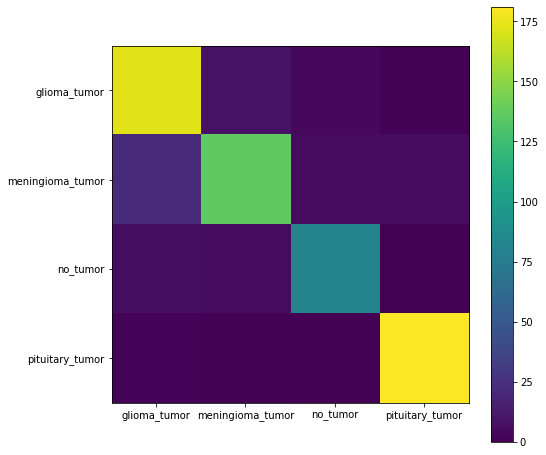

                  precision    recall  f1-score   support

    glioma_tumor       0.85      0.93      0.88       187
meningioma_tumor       0.90      0.81      0.85       169
        no_tumor       0.90      0.87      0.89        94
 pituitary_tumor       0.97      0.98      0.98       184

        accuracy                           0.90       634
       macro avg       0.90      0.90      0.90       634
    weighted avg       0.90      0.90      0.90       634



In [53]:
test_pred_tune1 = np.argmax(model_tuner1.predict(X_test), axis=-1)

#confusion matrix
cm = confusion_matrix(y_test, test_pred_tune1)
print('Confusion Matrix: ',cm)

#plot the confusion matrix
plt.figure(figsize=(8,8))
plt.imshow(confusion_matrix(y_test, test_pred_tune1))
plt.xticks(np.arange(4),CATEGORIES)
plt.yticks(np.arange(4),CATEGORIES)
plt.colorbar()
plt.show()

#classification report
print(classification_report(y_test, test_pred_tune1, target_names=CATEGORIES))

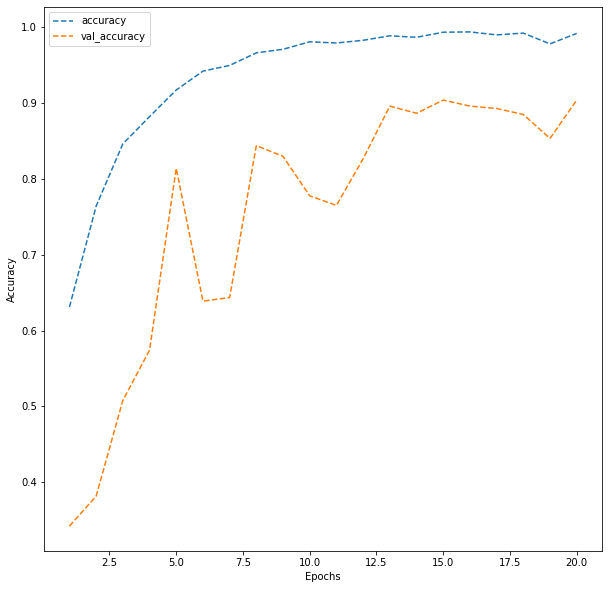

In [54]:
#plotting the accuracies

dict_hist_tune1 = hist_model_tune1.history

list_ep_tune1 = [i for i in range(1,21)]

plt.figure(figsize=(10,10))

plt.plot(list_ep_tune1, dict_hist_tune1['accuracy'], ls = '--', label='accuracy')
plt.plot(list_ep_tune1, dict_hist_tune1['val_accuracy'],ls = '--', label='val_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show() 

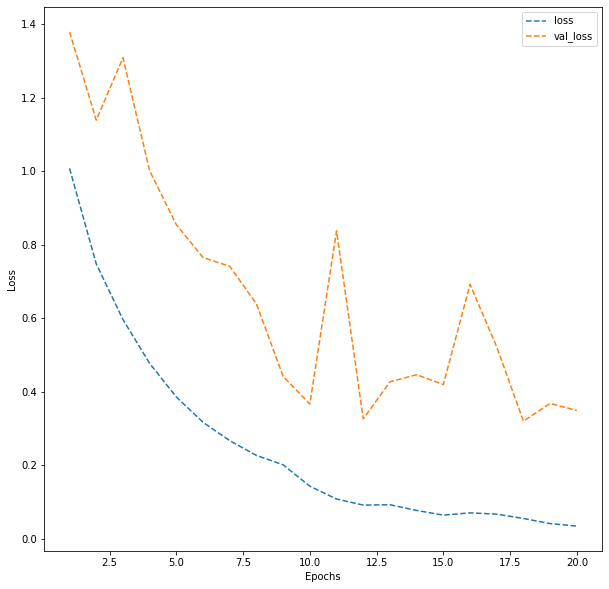

In [62]:
dict_hist_tune1 = hist_model_tune1.history

list_ep_tune1 = [i for i in range(1,21)]

plt.figure(figsize=(10,10))

plt.plot(list_ep_tune1, dict_hist2['loss'], ls = '--', label='loss')
plt.plot(list_ep_tune1, dict_hist2['val_loss'],ls = '--', label='val_loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show() 